# Model Selection and Evaluation

## Setup

In [1]:
%load_ext lab_black

In [13]:
import os
import re
import sys
import glob
import numpy as np
import pandas as pd

from pyhere import here
from scipy.stats import pearsonr
from sklearn.metrics import r2_score


sys.path.append(str(here("code", "3_task_modeling")))

import task_modeling_utils

In [3]:
def get_group_R2(df, observed="demean_log_yield", predicted="demean_oos_prediction"):
    return r2_score(df[observed], df[predicted])


def get_group_r2(df, observed="demean_log_yield", predicted="demean_oos_prediction"):
    return pearsonr(df[observed], df[predicted])[0]


def extract_float_from_string(s):
    if isinstance(s, str):
        match = re.search(r"\((.*),\)", s)
        return float(match.group(1)) if match else s
    else:
        return s

## Model Selection

In [4]:
model_selection_file_pattern = str(
    here("data", "results", "2_sensor_10-splits_*_*.csv")
)
model_selection_files = glob.glob(pathname=model_selection_file_pattern)
sorted(model_selection_files)

['C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_10-splits_2023-05-11_1_rcf_climate-False_anom-False.csv',
 'C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_10-splits_2023-05-11_2_rcf_climate-False_anom-False.csv',
 'C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_10-splits_2023-05-11_3_rcf_climate-False_anom-False.csv',
 'C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_10-splits_2023-05-11_4_rcf_climate-False_anom-False.csv',
 'C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_10-splits_2023-05-11_5_rcf_climate-False_anom-False.csv',
 'C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_10-splits_2023-05-11_6_rcf_climate-False_anom-Fals

In [5]:
model_selection_results = task_modeling_utils.merge_files(model_selection_files)
model_selection_results["anomaly"] = False
model_selection_results["variables"] = "rcf"
model_selection_results

,split,random_state,country,year_range,satellite_1,bands_1,num_features_1,points_1,month_range_1,limit_months_1,...,test_r,test_r2,demean_cv_R2,demean_cv_r,demean_cv_r2,demean_test_R2,demean_test_r,demean_test_r2,anomaly,variables
0,0,670487,ZMB,2013-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,4-9,True,...,0.877612,0.770203,-0.152476,0.209619,0.043940,0.317251,0.566477,0.320896,False,rcf
1,1,116739,ZMB,2013-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,4-9,True,...,0.850581,0.723488,-0.052934,0.315102,0.099289,0.172393,0.438688,0.192447,False,rcf
2,2,26225,ZMB,2013-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,4-9,True,...,0.855049,0.731108,-0.133622,0.291207,0.084801,0.259681,0.510103,0.260205,False,rcf
3,3,777572,ZMB,2013-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,4-9,True,...,0.844644,0.713424,-0.102605,0.269802,0.072793,0.104110,0.415304,0.172477,False,rcf
4,4,288389,ZMB,2013-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,4-9,True,...,0.864857,0.747978,-0.017219,0.318924,0.101713,0.198226,0.456946,0.208800,False,rcf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,5,256787,ZMB,2016-2022,sentinel-2-l2a,2-3-4,1000,4,1-12,False,...,0.907339,0.823264,0.083085,0.419647,0.176104,0.407650,0.638673,0.407903,False,rcf
1136,6,234053,ZMB,2016-2022,sentinel-2-l2a,2-3-4,1000,4,1-12,False,...,0.885996,0.784989,0.135070,0.441621,0.195029,0.397016,0.649107,0.421340,False,rcf
1137,7,146316,ZMB,2016-2022,sentinel-2-l2a,2-3-4,1000,4,1-12,False,...,0.891263,0.794350,0.098027,0.424884,0.180527,0.357868,0.641834,0.411951,False,rcf
1138,8,772246,ZMB,2016-2022,sentinel-2-l2a,2-3-4,1000,4,1-12,False,...,0.878019,0.770918,0.086787,0.405284,0.164255,0.122371,0.396368,0.157108,False,rcf


In [6]:
model_selection_group_cols = [
    "variables",
    "anomaly",
    "country",
    "year_range",
    "satellite_1",
    "bands_1",
    "num_features_1",
    "points_1",
    "month_range_1",
    "limit_months_1",
    "crop_mask_1",
    "weighted_avg_1",
    "satellite_2",
    "bands_2",
    "num_features_2",
    "points_2",
    "month_range_2",
    "limit_months_2",
    "crop_mask_2",
    "weighted_avg_2",
    "hot_encode",
]

model_selection_results_summary = model_selection_results.groupby(
    model_selection_group_cols, as_index=False
).agg(
    {
        "val_R2": "mean",
        "val_r2": "mean",
        "test_R2": "mean",
        "test_r2": "mean",
    }
)
model_selection_results_summary = model_selection_results_summary.sort_values(
    "val_R2", ascending=False
)
top_model = model_selection_results_summary.iloc[0:1, :]
top_model_dict = top_model.to_dict(orient="records")[0]
top_model_dict

{'variables': 'rcf',
 'anomaly': False,
 'country': 'ZMB',
 'year_range': '2016-2021',
 'satellite_1': 'landsat-c2-l2',
 'bands_1': 'r-g-b-nir-swir16-swir22',
 'num_features_1': 1024,
 'points_1': 20,
 'month_range_1': '4-9',
 'limit_months_1': True,
 'crop_mask_1': True,
 'weighted_avg_1': False,
 'satellite_2': 'sentinel-2-l2a',
 'bands_2': '2-3-4-8',
 'num_features_2': 1000,
 'points_2': 15,
 'month_range_2': '1-12',
 'limit_months_2': False,
 'crop_mask_2': True,
 'weighted_avg_2': False,
 'hot_encode': True,
 'val_R2': 0.8002404610219435,
 'val_r2': 0.8017879820931079,
 'test_R2': 0.8258186120850981,
 'test_r2': 0.8325650503230417}

In [7]:
# Define the keys to remove
keys_to_remove = ["val_R2", "val_r2", "test_R2", "test_r2"]

# Remove keys
for key in keys_to_remove:
    if key in top_model_dict:
        del top_model_dict[key]

top_model_splits = model_selection_results.copy()

for key, value in top_model_dict.items():
    if key in model_selection_results.columns:
        top_model_splits = top_model_splits[top_model_splits[key] == value]
top_model_splits

,split,random_state,country,year_range,satellite_1,bands_1,num_features_1,points_1,month_range_1,limit_months_1,...,test_r,test_r2,demean_cv_R2,demean_cv_r,demean_cv_r2,demean_test_R2,demean_test_r,demean_test_r2,anomaly,variables
520,0,670487,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.940330,0.884220,0.156059,0.465797,0.216967,0.432052,0.677854,0.459487,False,rcf
521,1,116739,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.900153,0.810276,0.130357,0.466772,0.217876,0.656420,0.810435,0.656806,False,rcf
522,2,26225,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.874968,0.765569,0.035232,0.474167,0.224835,0.583502,0.764482,0.584432,False,rcf
523,3,777572,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.927930,0.861055,0.197228,0.518008,0.268332,0.475429,0.695419,0.483608,False,rcf
524,4,288389,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.906155,0.821116,0.256791,0.540645,0.292297,0.420944,0.681600,0.464579,False,rcf
525,5,256787,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.901840,0.813316,0.206182,0.512397,0.262551,0.299514,0.562121,0.315980,False,rcf
526,6,234053,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.918529,0.843696,0.223710,0.524803,0.275418,0.587511,0.772865,0.597321,False,rcf
527,7,146316,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.891916,0.795514,0.224398,0.512865,0.263031,0.045839,0.334379,0.111809,False,rcf
528,8,772246,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.931087,0.866924,0.133278,0.470515,0.221385,0.446182,0.667987,0.446207,False,rcf
529,9,107473,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.929497,0.863965,0.131317,0.459822,0.211436,0.574721,0.779260,0.607246,False,rcf


## All top model splits

In [9]:
top_model_file_pattern = str(
    here("data", "results", "2_sensor_top-mod_10-splits_*_*.csv")
)
top_model_files = glob.glob(pathname=top_model_file_pattern)
sorted(top_model_files)

['C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_top-mod_10-splits_2023-05-22_rcf_climate-True_anom-False.csv',
 'C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_top-mod_10-splits_2023-06-08_rcf_climate-False_anom-True.csv',
 'C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_top-mod_10-splits_2023-06-08_rcf_climate-True_anom-True.csv']

In [10]:
top_model_results = task_modeling_utils.merge_files(top_model_files)
top_model_results["anomaly"] = top_model_results["demean_cv_R2"].isnull()
top_model_results["variables"] = top_model_results["variables"].fillna("rcf")

top_model_results["val_R2"] = top_model_results["val_R2"].apply(
    extract_float_from_string
)

top_model_results = pd.concat([top_model_results, top_model_splits])
top_model_results.head(10)

,split,random_state,variables,country,year_range,satellite_1,bands_1,num_features_1,points_1,month_range_1,...,test_R2,test_r,test_r2,demean_cv_R2,demean_cv_r,demean_cv_r2,demean_test_R2,demean_test_r,demean_test_r2,anomaly
0,0,670487,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.847675,0.938276,0.880362,0.209737,0.523837,0.274405,0.545070,0.738365,0.545183,False
1,1,116739,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.803469,0.900288,0.810518,0.131235,0.467381,0.218445,0.657664,0.811210,0.658062,False
2,2,26225,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.824435,0.908954,0.826197,0.144580,0.461305,0.212803,0.700661,0.860644,0.740707,False
3,3,777572,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.863111,0.929479,0.863932,0.204904,0.523020,0.273550,0.478438,0.697391,0.486354,False
4,4,288389,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.814105,0.908593,0.825542,0.309138,0.577654,0.333684,0.428592,0.690432,0.476696,False
5,5,256787,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.780335,0.884826,0.782917,0.086451,0.491176,0.241254,0.212076,0.469716,0.220633,False
6,6,234053,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.839898,0.919857,0.846137,0.281425,0.573529,0.328936,0.519446,0.742793,0.551741,False
7,7,146316,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.800192,0.895981,0.802781,0.260074,0.542605,0.294420,0.049373,0.348908,0.121737,False
8,8,772246,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.843533,0.927076,0.859469,0.168657,0.495024,0.245049,0.477862,0.691418,0.478059,False
9,9,107473,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.868590,0.932461,0.869483,0.165132,0.484519,0.234759,0.606238,0.793241,0.629231,False


In [38]:
top_model_group_cols = [
    "variables",
    "anomaly",
]

top_model_results_summary = top_model_results.groupby(
    top_model_group_cols, as_index=False
).agg(
    {
        "val_R2": "mean",
        "val_r2": "mean",
        "test_R2": "mean",
        "test_r2": "mean",
        "demean_cv_R2": "mean",
        "demean_cv_r2": "mean",
        "demean_test_R2": "mean",
        "demean_test_r2": "mean",
        # "split": "count",
    }
)
top_model_results_summary = top_model_results_summary.sort_values(
    "val_R2", ascending=False
)
top_model_results_summary

,variables,anomaly,val_R2,val_r2,test_R2,test_r2,demean_cv_R2,demean_cv_r2,demean_test_R2,demean_test_r2
2,ndvi_tmp,False,0.817228,0.818720,0.838532,0.848717,0.233745,0.299423,0.482423,0.503770
0,ndvi,False,0.807060,0.808597,0.828534,0.836734,0.196133,0.265730,0.467542,0.490840
4,rcf,False,0.800240,0.801788,0.825819,0.832565,0.169455,0.245413,0.452211,0.472747
3,ndvi_tmp,True,0.557521,0.581597,0.532043,0.577524,NaN,NaN,NaN,NaN
1,ndvi,True,0.545656,0.571953,0.507439,0.568984,NaN,NaN,NaN,NaN
5,rcf,True,0.518647,0.555297,0.496935,0.561006,NaN,NaN,NaN,NaN


In [35]:
top_model_group_cols = [
    "variables",
    "anomaly",
]

top_model_results_summary = top_model_results.groupby(
    top_model_group_cols, as_index=False
).agg(
    {
        "val_R2": "sem",
        "val_r2": "sem",
        "test_R2": "sem",
        "test_r2": "sem",
        "split": "count",
    }
)
top_model_results_summary = top_model_results_summary.sort_values(
    "val_R2", ascending=False
)
top_model_results_summary

,variables,anomaly,val_R2,val_r2,test_R2,test_r2,split
3,ndvi_tmp,True,0.013249,0.009761,0.055065,0.038450,10
1,ndvi,True,0.012214,0.008792,0.073715,0.044947,10
5,rcf,True,0.011014,0.008619,0.065979,0.036257,10
4,rcf,False,0.005756,0.005747,0.011074,0.011846,10
0,ndvi,False,0.004306,0.004191,0.009129,0.010162,10
2,ndvi_tmp,False,0.004259,0.004287,0.008680,0.009619,10


## Out of Sample Predictions

In [109]:
oos_prediction_file_pattern = str(
    here(
        "data", "results", "2_sensor_top-mod_oos_predictions_10-splits_*_anom-False.csv"
    )
)
oos_prediction_files = glob.glob(pathname=oos_prediction_file_pattern)
sorted(oos_prediction_files)

['C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_top-mod_oos_predictions_10-splits_2023-05-22_rcf_climate-True_anom-False.csv',
 'C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_top-mod_oos_predictions_10-splits_2023-05-24_rcf_climate-False_anom-False.csv']

In [110]:
oos_prediction = task_modeling_utils.merge_files(oos_prediction_files)
# oos_prediction

In [111]:
oos_prediction_demean_groups = [
    # "data_fold",
    "district",
    # "val_fold",
    "split",
    "random_state",
    "variables",
]
oos_prediction = task_modeling_utils.demean_by_group(
    df=oos_prediction,
    observed="log_yield",
    predicted="oos_prediction",
    group=oos_prediction_demean_groups,
)
oos_prediction

,data_fold,district,year,yield_mt,log_yield,oos_prediction,val_fold,demean_log_yield,demean_oos_prediction,split,random_state,variables,anomaly
0,train,Kaoma,2019,0.523864,0.182946,0.279325,1,-0.192782,-0.083106,0,670487,ndvi,False
1,train,Kaoma,2017,1.540420,0.404906,0.368853,1,0.029177,0.006422,0,670487,ndvi,False
2,train,Sinazongwe,2020,0.589120,0.201157,0.205528,1,-0.021142,-0.040476,0,670487,ndvi,False
3,train,Kasempa,2020,3.349064,0.638396,0.555924,1,0.077697,0.004680,0,670487,ndvi,False
4,train,Shangombo,2020,0.741213,0.240852,0.166590,1,0.071072,-0.026349,0,670487,ndvi,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,test,Chadiza,2018,1.299279,0.361592,0.473302,6,-0.142270,-0.047877,9,107473,rcf,False
12596,test,Mkushi,2020,2.819023,0.581952,0.623098,6,-0.022751,0.010660,9,107473,rcf,False
12597,test,Kitwe,2020,2.771743,0.576542,0.555150,6,0.027490,0.016864,9,107473,rcf,False
12598,test,Nchelenge,2019,1.604964,0.415802,0.524416,6,-0.090286,-0.013202,9,107473,rcf,False


In [112]:
oos_prediction_r2_groups = [
    "data_fold",
    "split",
    "random_state",
    "variables",
]

oos_prediction_R2 = oos_prediction.groupby(
    oos_prediction_r2_groups, as_index=False
).apply(get_group_R2)
oos_prediction_R2.rename(columns={None: "demean_R2"}, inplace=True)

oos_prediction_r2 = oos_prediction.groupby(
    oos_prediction_r2_groups, as_index=False
).apply(get_group_r2)
oos_prediction_r2.rename(columns={None: "demean_r"}, inplace=True)

oos_prediction_r2["demean_r2"] = oos_prediction_r2["demean_r"] ** 2

oos_prediction_summary = (
    oos_prediction_R2.set_index(oos_prediction_r2_groups)
    .join(oos_prediction_r2.set_index(oos_prediction_r2_groups))
    .reset_index()
)

# oos_prediction_summary.sort_values(["variables", "data_fold"])

In [113]:
oos_prediction_summary_r2_groups = [
    "data_fold",
    "variables",
]
oos_prediction_summary = (
    oos_prediction_summary.groupby(oos_prediction_summary_r2_groups, as_index=False)
    .agg(
        {
            "demean_R2": "mean",
            "demean_r2": "mean",
            # "demean_R2": "sem",
            # "demean_r2": "sem",
        }
    )
    .sort_values("variables")
)
# oos_prediction_summary

In [114]:
# Pivot the DataFrame
oos_prediction_summary = oos_prediction_summary.pivot_table(
    index="variables", columns="data_fold"
)

# Flatten the MultiIndex columns
oos_prediction_summary.columns = [
    "_".join(col) for col in oos_prediction_summary.columns
]

# Reset the index
oos_prediction_summary = oos_prediction_summary.reset_index()
oos_prediction_summary = oos_prediction_summary.set_index(
    [
        "variables",
        "demean_R2_train",
        "demean_r2_train",
        "demean_R2_test",
        "demean_r2_test",
    ]
)
oos_prediction_summary = oos_prediction_summary.reset_index()
oos_prediction_summary.sort_values("demean_R2_train", ascending=False)

,variables,demean_R2_train,demean_r2_train,demean_R2_test,demean_r2_test
1,ndvi_tmp,0.241968,0.305109,0.465289,0.490269
0,ndvi,0.202919,0.270467,0.436300,0.464429
2,rcf,0.175158,0.249939,0.413638,0.444085


## Anomaly Model

In [39]:
anomaly_file_pattern = str(
    here(
        "data", "results", "2_sensor_top-mod_oos_predictions_10-splits_*_anom-True.csv"
    )
)
anomaly_files = glob.glob(pathname=anomaly_file_pattern)
sorted(anomaly_files)

['C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_top-mod_oos_predictions_10-splits_2023-06-08_rcf_climate-False_anom-True.csv',
 'C:\\Users\\Cullen\\Desktop\\GitHub\\crop-modeling\\code\\4_explore_results\\..\\..\\data\\results\\2_sensor_top-mod_oos_predictions_10-splits_2023-06-08_rcf_climate-True_anom-True.csv']

In [31]:
anomaly_predictions = task_modeling_utils.merge_files(anomaly_files)
anomaly_predictions["variables"] = anomaly_predictions["variables"].fillna("rcf")
anomaly_predictions

,data_fold,district,year,yield_mt,log_yield,oos_prediction,val_fold,demean_log_yield,demean_oos_prediction,split,random_state,variables,anomaly
0,train,Kaoma,2019,-0.898481,-0.192782,-0.041405,1,-0.183223,-0.050561,0,670487,rcf,True
1,train,Kaoma,2017,0.118076,0.029177,0.013875,1,0.038736,0.004719,0,670487,rcf,True
2,train,Sinazongwe,2020,-0.125243,-0.021142,-0.037015,1,-0.003610,0.011164,0,670487,rcf,True
3,train,Kasempa,2020,0.694315,0.077697,0.078310,1,0.077697,0.077179,0,670487,rcf,True
4,train,Shangombo,2020,0.239461,0.071072,0.049235,1,0.107542,0.086956,0,670487,rcf,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,test,Chadiza,2018,-0.939644,-0.142270,-0.057494,6,-0.067046,0.011819,9,107473,ndvi_tmp,True
12596,test,Mkushi,2020,-0.230178,-0.022751,-0.002032,6,0.000000,0.000000,9,107473,ndvi_tmp,True
12597,test,Kitwe,2020,0.216271,0.027490,0.077866,6,0.049585,0.098007,9,107473,ndvi_tmp,True
12598,test,Nchelenge,2019,-0.618532,-0.090286,0.007744,6,-0.078163,0.016534,9,107473,ndvi_tmp,True


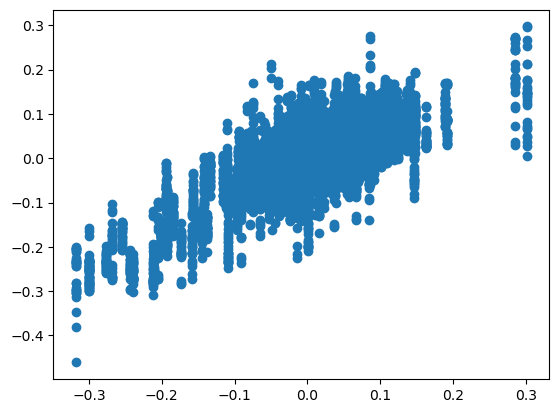

In [32]:
import matplotlib.pyplot as plt

test = anomaly_predictions.copy()
# test = test.loc[(test["variables"] == "rcf") & (test["split"] == 0)]
plt.scatter(test["log_yield"], test["oos_prediction"])

In [33]:
r2_groups = [
    "data_fold",
    "split",
    "random_state",
    "variables",
]


grouped_R2 = anomaly_predictions.groupby(r2_groups, as_index=False).apply(
    get_group_R2, "log_yield", "oos_prediction"
)
grouped_R2.rename(columns={None: "oos_R2"}, inplace=True)
grouped_R2

,data_fold,split,random_state,variables,oos_R2
0,test,0,670487,ndvi,0.010341
1,test,0,670487,ndvi_tmp,0.194082
2,test,0,670487,rcf,-0.004938
3,test,1,116739,ndvi,0.647465
4,test,1,116739,ndvi_tmp,0.654718
5,test,1,116739,rcf,0.608922
6,test,2,26225,ndvi,0.673633
7,test,2,26225,ndvi_tmp,0.670499
8,test,2,26225,rcf,0.663557
9,test,3,777572,ndvi,0.650410


In [34]:
demean_summary_r2_groups = [
    "data_fold",
    "variables",
]
grouped_R2.groupby(demean_summary_r2_groups, as_index=False).agg(
    {"oos_R2": "mean"}
).sort_values("variables")

,data_fold,variables,oos_R2
0,test,ndvi,0.507439
3,train,ndvi,0.545656
1,test,ndvi_tmp,0.532043
4,train,ndvi_tmp,0.557521
2,test,rcf,0.496935
5,train,rcf,0.518647
